In [1]:
import geopandas as gpd

In [2]:
df = gpd.read_parquet("example_data/nyc_bike_trips.parquet")
df

,h3,morning_starts,morning_ends,afternoon_starts,afternoon_ends,geometry
0,617733120577503231,58,15,24,38,"POLYGON ((-73.88768 40.876, -73.88979 40.87506..."
1,617733120577765375,18,5,32,50,"POLYGON ((-73.88543 40.87341, -73.88755 40.872..."
2,617733120578027519,8,26,24,21,"POLYGON ((-73.89196 40.87589, -73.89407 40.874..."
3,617733120578289663,129,61,103,108,"POLYGON ((-73.88972 40.8733, -73.89183 40.8723..."
4,617733120578551807,50,14,72,80,"POLYGON ((-73.88563 40.8787, -73.88774 40.8777..."
...,...,...,...,...,...,...
1496,617733152329433087,86,88,73,59,"POLYGON ((-74.00425 40.67719, -74.00635 40.676..."
1497,617733152329695231,70,94,147,88,"POLYGON ((-74.00201 40.67461, -74.00411 40.673..."
1498,617733152329957375,51,49,38,45,"POLYGON ((-74.00852 40.67707, -74.01062 40.676..."
1499,617733152333627391,144,132,206,197,"POLYGON ((-74.01503 40.67954, -74.01713 40.678..."


/var/folders/48/bnhhxw916t79kzvrcmr9ghcc0000gn/T/ipykernel_53541/2556680235.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


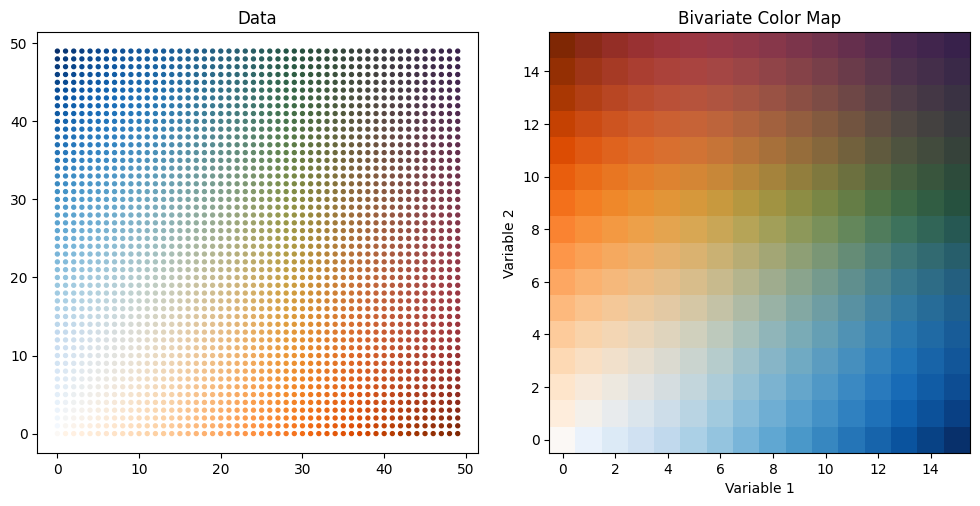

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from bivario.cmap import cmap_from_bivariate_data

xx, yy = np.mgrid[0:50, 0:50]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
x = xx.flatten()
y = yy.flatten()
cflat = C_map.reshape((len(x), 4))
plt.scatter(x, y, c=cflat, s=8)

ax1.set_title("Data")

xx, yy = np.mgrid[0:16, 0:16]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(C_map)
ax2.set_title("Bivariate Color Map")
ax2.set_xlabel("Variable 1")
ax2.set_ylabel("Variable 2")
ax2.set_ylim((-0.5, 0.5 + (yy.max() - yy.min())))

fig.tight_layout()
fig.show()

In [7]:
from mapclassify import classify

binning_start = classify(df["morning_starts"], scheme="NaturalBreaks", k=5)
binning_end = classify(df["morning_ends"], scheme="NaturalBreaks", k=5)
binning_end

NaturalBreaks

     Interval        Count
--------------------------
[   0.00,  257.00] |  1069
( 257.00,  729.00] |   238
( 729.00, 1377.00] |   108
(1377.00, 2358.00] |    58
(2358.00, 3689.00] |    28

In [15]:
binning_start.bins

array([ 193.,  547., 1078., 1927., 4740.])

In [8]:
C_map = cmap_from_bivariate_data(binning_start.yb, binning_end.yb, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)
C_map

array([[0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       ...,
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ],
       [0.98431373, 0.97254902, 0.96078431, 1.        ]], shape=(1501, 4))



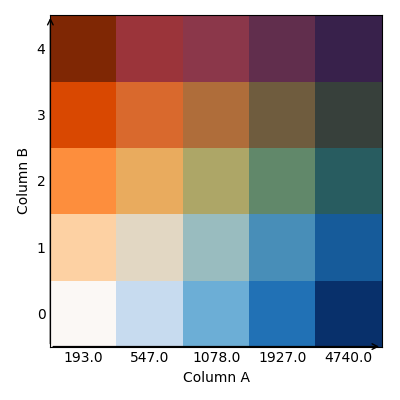

/var/folders/48/bnhhxw916t79kzvrcmr9ghcc0000gn/T/ipykernel_53541/2529076422.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


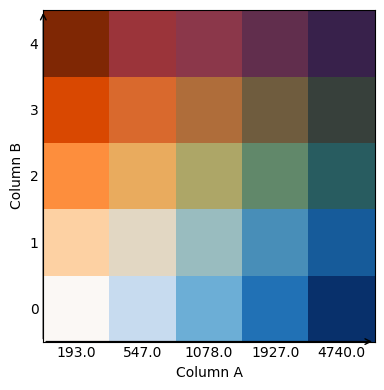


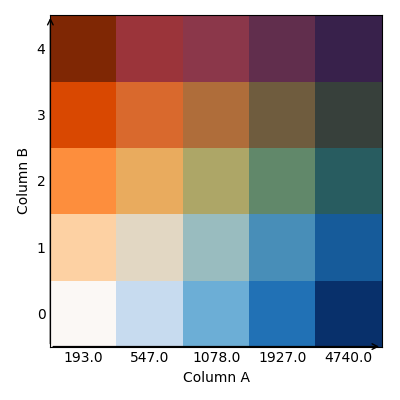

In [16]:
import base64
from PIL import Image
from folium.plugins import FloatImage

default_grid_size = 5
current_grid_size = 5
# current_grid_size = 5
xx, yy = np.mgrid[0:current_grid_size, 0:current_grid_size]
C_map = cmap_from_bivariate_data(xx, yy, cmap1=plt.cm.Oranges, cmap2=plt.cm.Blues)

img = Image.fromarray(np.uint8((C_map)[:, :, :3] * 255))

# img = img.transpose(Image.FLIP_TOP_BOTTOM)  # .resize((100, 100), resample=0)

figure_size_px = 200
dpi = 100


fig, ax = plt.subplots(
    figsize=((figure_size_px * 2) / dpi, (figure_size_px * 2) / dpi), dpi=dpi
)
ax.imshow(img, origin="lower")
ax.tick_params(axis="both", which="both", length=0)
# ax.axis("off")

# fig.tight_layout()

ax.annotate(
    "",
    xy=(0, 1),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle="->", lw=1),
    xycoords="axes fraction",
)
ax.annotate(
    "",
    xy=(1, 0),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle="->", lw=1),
    xycoords="axes fraction",
)

ax.set_ylabel("Column B")
ax.set_xlabel("Column A")

labels = [0, *binning_start.bins]

ax.set_xticklabels(labels)


# plt.show()


def figure_to_base64_string(plt_fig):
    import io

    buffered = io.BytesIO()
    # img.save(buffered, format="PNG")
    plt_fig.tight_layout()
    plt_fig.savefig(buffered, transparent=True, dpi=100)
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


# fig.savefig('temp.png', transparent=True)

m = df.reset_index().explore(
    "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
)
data_url = "data:image/png;base64," + figure_to_base64_string(fig)
print(data_url)

FloatImage(data_url, bottom=8, left=2, width=f"{figure_size_px}px").add_to(m)

plt.show()
m

In [9]:
from matplotlib.colors import rgb2hex


cmap = cmap_from_bivariate_data(
    binning_start.yb,
    binning_end.yb,
    cmap1=plt.cm.Oranges,
    cmap2=plt.cm.Blues,
)
hex_values = [rgb2hex(cmap[i, :]) for i in range(cmap.shape[0])]

color_dict = dict(zip(df.index, hex_values))

m = df.reset_index().explore(
    "index", cmap=lambda x: color_dict[x], legend=False, tiles="CartoDB Positron"
)
m